In [1]:
import itertools
from process_bigraph import Composite
from spatio_flux import core
from spatio_flux.viz.plot import plot_time_series, plot_species_distributions_to_gif, plot_species_distributions_with_particles_to_gif
from spatio_flux.processes.dfba import DynamicFBA, get_single_dfba_spec, get_spatial_dfba_state
from spatio_flux.processes.diffusion_advection import DiffusionAdvection, get_diffusion_advection_spec, get_diffusion_advection_state
from spatio_flux.processes.particles import Particles, get_particles_spec, get_particles_state
from spatio_flux.processes.particle_comets import get_particle_comets_state

In [2]:
core.process_registry.list()

['Particles',
 'DynamicFBA',
 'console-emitter',
 'bounds',
 'ram-emitter',
 'DiffusionAdvection',
 'composite']

# Processes

## dFBA process

In [3]:
total_time = 60.0

# get dfba config
single_dfba_config = {
    'dfba': get_single_dfba_spec(path=['fields']),
    'fields': {
        'glucose': 10,
        'acetate': 0,
        'biomass': 0.1
    }
}

# make the simulation
sim = Composite({
    'state': single_dfba_config,
    'emitter': {'mode': 'all'}
}, core=core)

# save the document
sim.save(filename='single_dfba.json', outdir='out')

# simulate
print('Simulating...')
sim.update({}, total_time)

# gather results
dfba_results = sim.gather_results()

Created new file: out/single_dfba.json
Simulating...


Plotting results...
saving out/dfba_single_timeseries.png


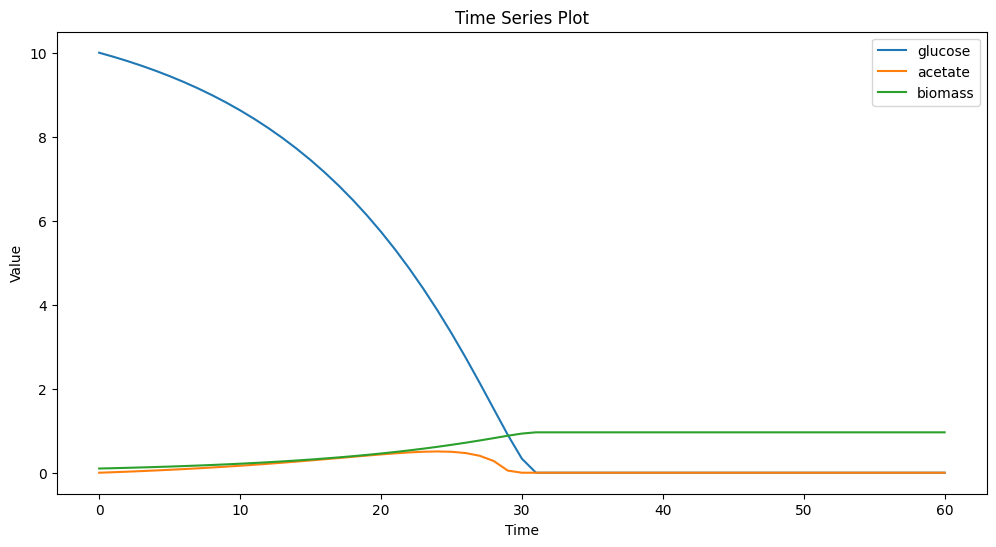

In [4]:
print('Plotting results...')
# plot timeseries
plot_time_series(
    dfba_results,
    out_dir='out',
    filename='dfba_single_timeseries.png',
)

## Diffusion advection process

In [5]:
total_time = 50
bounds = (10.0, 20.0)
n_bins = (10, 20)

# get the config
composite_state = get_diffusion_advection_state(
    bounds=bounds,
    n_bins=n_bins,
    mol_ids=['glucose', 'acetate', 'biomass'],
    advection_coeffs={
        'biomass': (0, -0.1)
    }
)

# make the composite
print('Making the composite...')
sim = Composite({
    'state': composite_state,
    'emitter': {'mode': 'all'},
}, core=core)

# save the document
sim.save(filename='diffadv.json', outdir='out')

# # save a viz figure of the initial state

# simulate
print('Simulating...')
sim.update({}, total_time)

# gather results
diffadv_results = sim.gather_results()

Making the composite...
Created new file: out/diffadv.json
Simulating...


Plotting results...
saving out/diffadv_results.gif



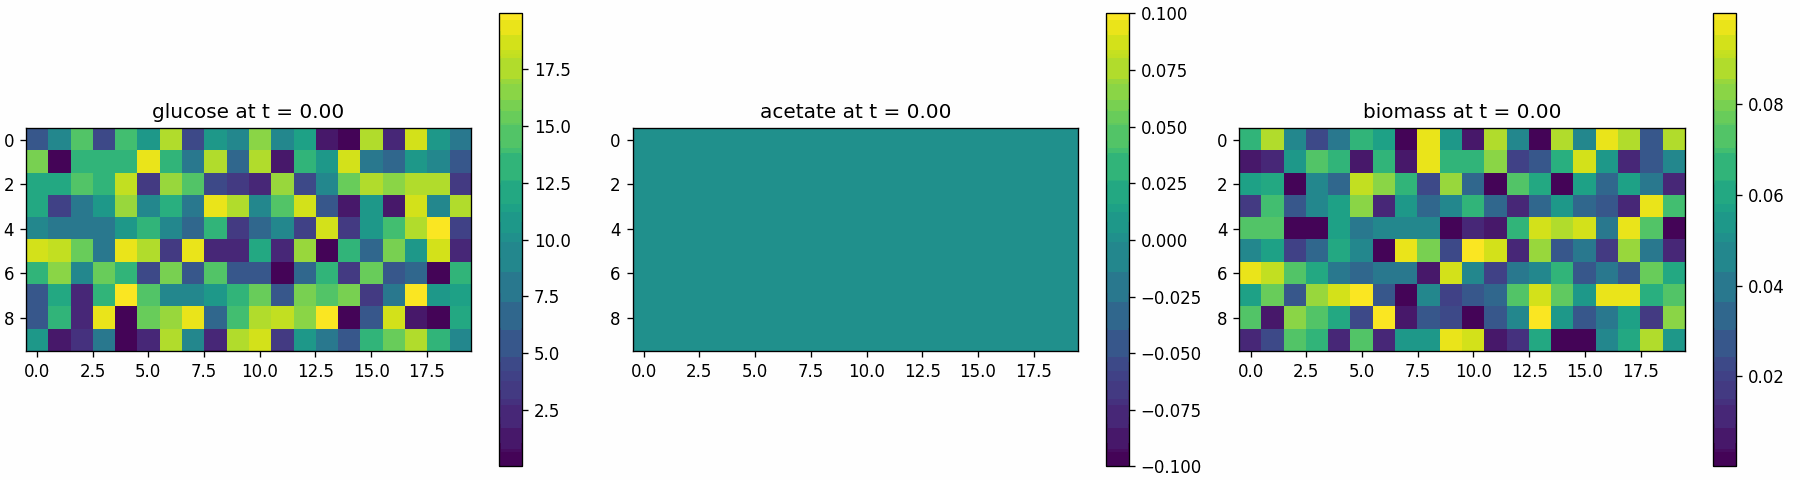

In [6]:
print('Plotting results...')
# plot 2d video
plot_species_distributions_to_gif(
    diffadv_results,
    out_dir='out',
    filename='diffadv_results.gif',
    title='',
    skip_frames=1
)

## Particles process

In [7]:
total_time=100
bounds=(10.0, 20.0)  # Bounds of the environment
n_bins=(20, 40)  # Number of bins in the x and y directions
n_particles=20
diffusion_rate=0.1
advection_rate=(0, -0.1)
add_probability=0.4
field_interactions=None
initial_min_max=None

composite_state = get_particles_state(
    bounds=bounds,
    n_bins=n_bins,
    n_particles=n_particles,
    diffusion_rate=diffusion_rate,
    advection_rate=advection_rate,
    add_probability=add_probability,
    field_interactions=field_interactions,
    initial_min_max=initial_min_max,
)

# make the composite
print('Making the composite...')
sim = Composite({
    'state': composite_state,
    'emitter': {'mode': 'all'},
}, core=core)

# save the document
sim.save(filename='particles.json', outdir='out')

# # save a viz figure of the initial state

# simulate
print('Simulating...')
sim.update({}, total_time)

# gather results
particles_results = sim.gather_results()
emitter_results = particles_results[('emitter',)]

particles_history = [p['particles'] for p in emitter_results]

Making the composite...
Created new file: out/particles.json
Simulating...


Plotting...
saving out/particle_with_fields.gif



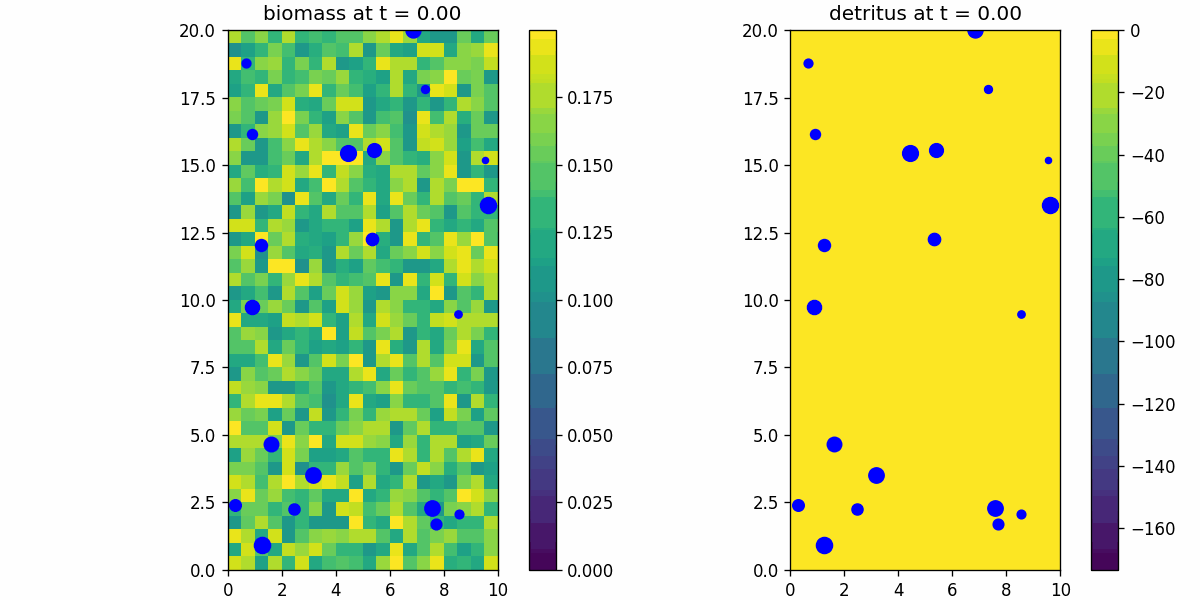

In [8]:
print('Plotting...')
# plot particles
plot_species_distributions_with_particles_to_gif(
    particles_results,
    out_dir='out',
    filename='particle_with_fields.gif',
    title='',
    skip_frames=1,
    bounds=bounds,
)


# Composites

## Spatial dFBA

In [9]:
total_time = 100
n_bins = (5, 5)
mol_ids = ['glucose', 'acetate', 'biomass']

composite_state = get_spatial_dfba_state(
    n_bins=n_bins,
    mol_ids=mol_ids,
)

# make the composite
print('Making the composite...')
sim = Composite({
    'state': composite_state,
    'emitter': {'mode': 'all'}
}, core=core)

# save the document
sim.save(filename='spatial_dfba.json', outdir='out')

# # save a viz figure of the initial state

# simulate
print('Simulating...')
sim.update({}, total_time)

# gather results
dfba_results = sim.gather_results()

Making the composite...
Created new file: out/spatial_dfba.json
Simulating...


Plotting results...
saving out/spatial_dfba_results.gif



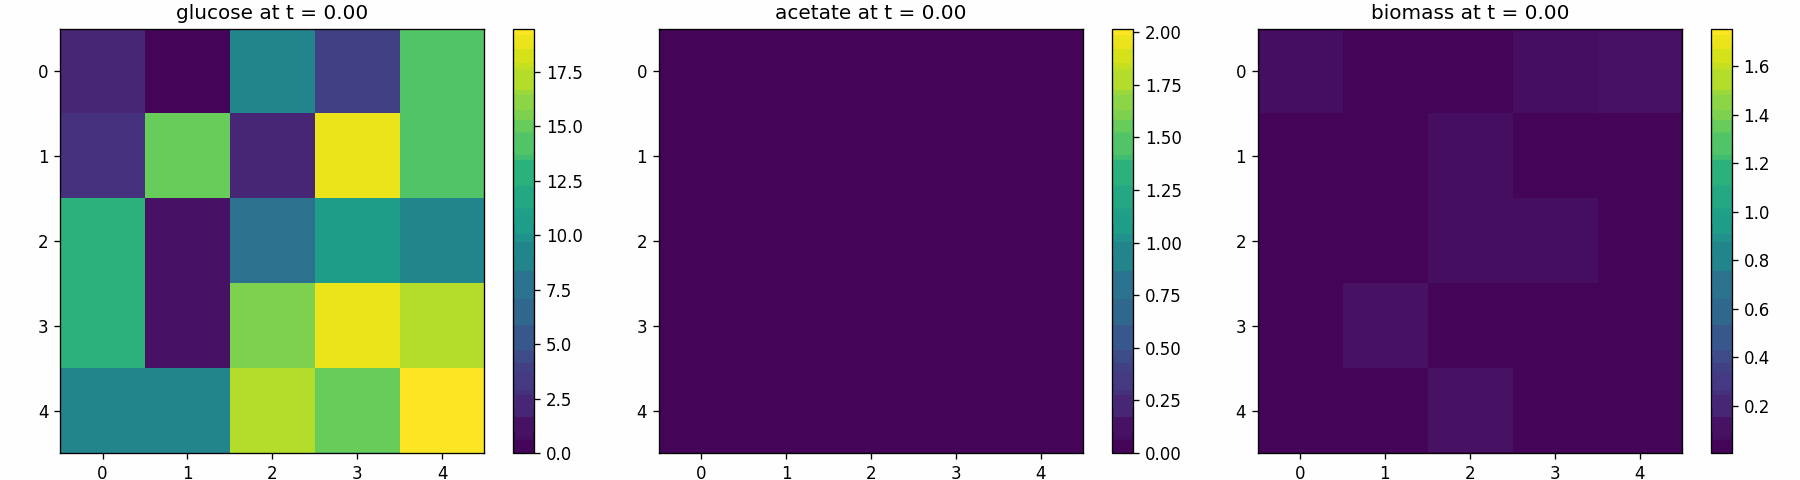

In [10]:
print('Plotting results...')
# make video
plot_species_distributions_to_gif(
    dfba_results,
    out_dir='out',
    filename='spatial_dfba_results.gif',
    title='',
    skip_frames=1
)

saving out/spatial_dfba_timeseries.png


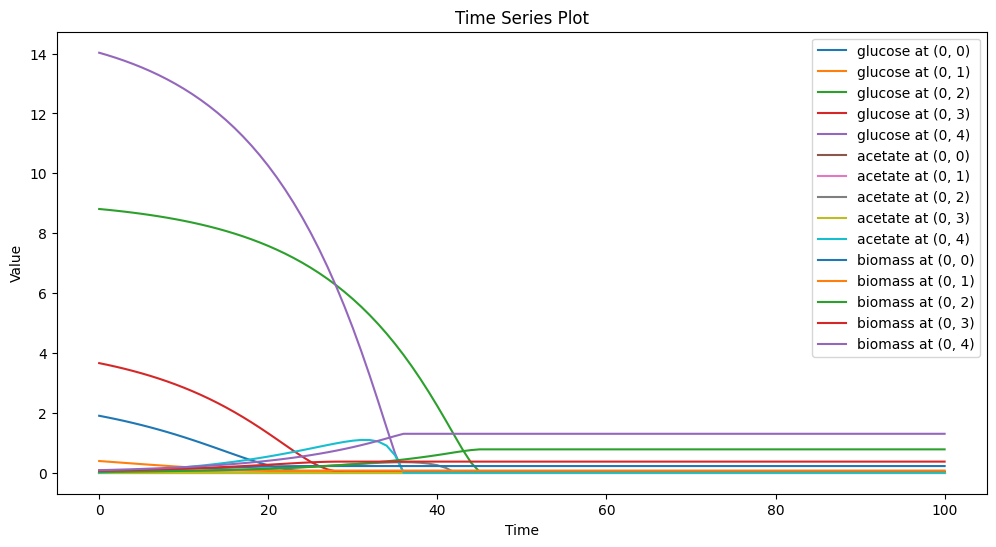

In [11]:
# plot single traces from spatial dfba
fixed_x = 0
coord_combinations = [(fixed_x, y) for y in range(n_bins[1])]
# coord_combinations = list(itertools.product(range(n_bins[0]), range(n_bins[1])))  # all combinations
plot_time_series(
    dfba_results,
    coordinates=coord_combinations,
    out_dir='out',
    filename='spatial_dfba_timeseries.png',
)

## COMETS

In [12]:
comets_config = {
    'total_time': 10.0,
    # environment size
    'bounds': (10.0, 10.0),
    'n_bins': (10, 10),
    # set fields
    'mol_ids': ['glucose', 'acetate', 'biomass'],
    'initial_min_max': {
        'glucose': (0, 10), 
        'acetate': (0, 0), 
        'biomass': (0, 0.1)
    },
}

In [13]:
# make the composite state
composite_state = get_spatial_dfba_state(
    n_bins=comets_config['n_bins'],
    mol_ids=comets_config['mol_ids'],
    initial_min_max=comets_config['initial_min_max'],
)
composite_state['diffusion'] = get_diffusion_advection_spec(
    bounds=comets_config['bounds'],
    n_bins=comets_config['n_bins'],
    mol_ids=comets_config['mol_ids'],
    default_diffusion_rate=1e-1,
    default_advection_rate=(0, 0),
    diffusion_coeffs=None,  # TODO add all these config options
    advection_coeffs=None,
)

# make the composite
print('Making the composite...')
sim = Composite({
    'state': composite_state,
    'emitter': {'mode': 'all'},
}, core=core)

# save the document
sim.save(filename='comets.json', outdir='out', include_schema=True)

# # save a viz figure of the initial state

# simulate
print('Simulating...')
sim.update({}, total_time)
comets_results = sim.gather_results()

Making the composite...
Created new file: out/comets.json
Simulating...


Plotting results...
saving out/comets_results.gif



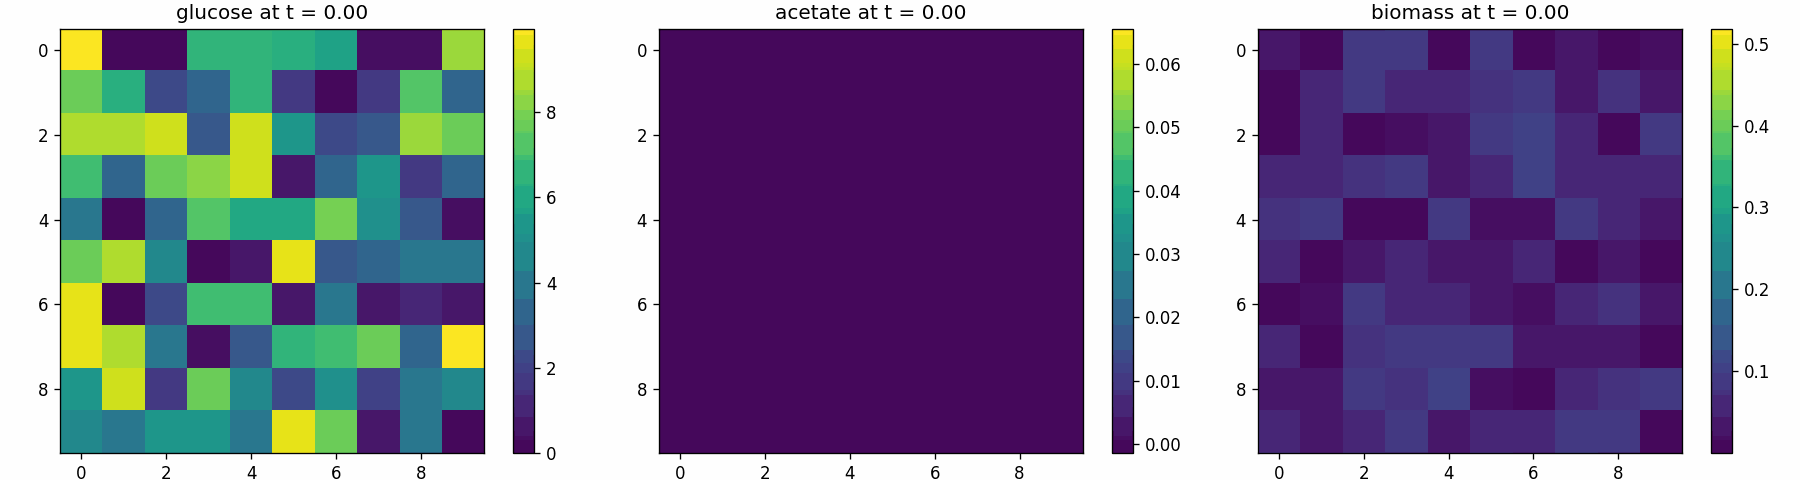

In [14]:
print('Plotting results...')
# plot 2d video
plot_species_distributions_to_gif(
    comets_results,
    out_dir='out',
    filename='comets_results.gif',
    title='',
    skip_frames=1)

saving out/comets_timeseries.png


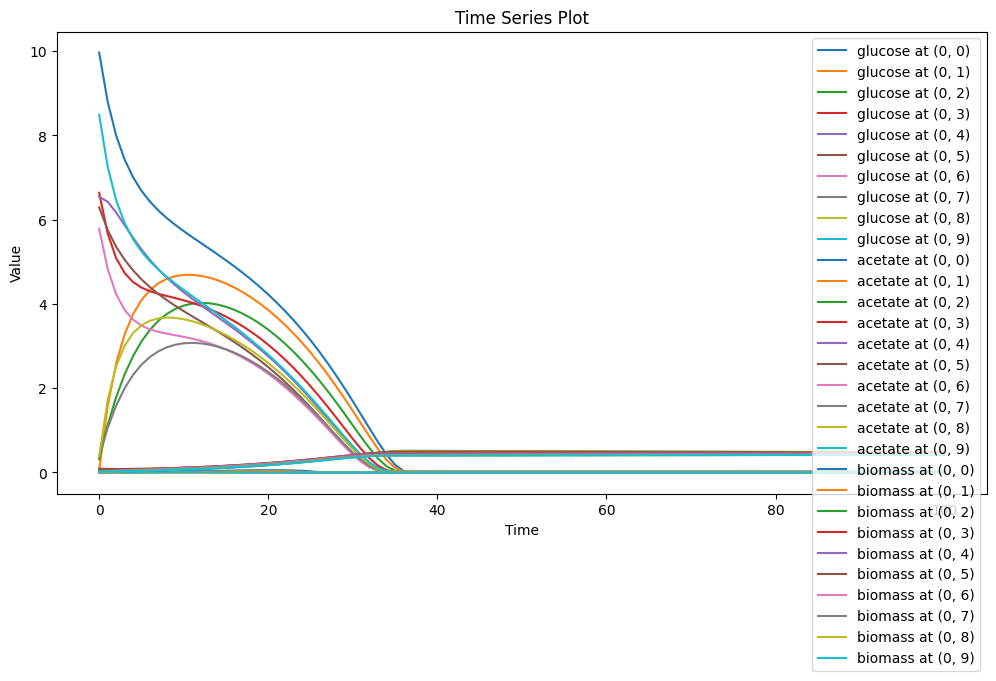

In [15]:
# plot single traces from comets
fixed_x = 0
n_bins = comets_config['n_bins']
coord_combinations = [(fixed_x, y) for y in range(n_bins[1])]
# coord_combinations = list(itertools.product(range(n_bins[0]), range(n_bins[1])))  # all combinations
plot_time_series(
    comets_results,
    coordinates=coord_combinations,
    out_dir='out',
    filename='comets_timeseries.png',
)

## Particle-COMETS

In [16]:
total_time = 20
particle_comets_config = {
    # 'total_time': 100.0,
    # environment size
    'bounds': (10.0, 20.0),
    'n_bins': (8, 16),
    # set fields
    'mol_ids': ['glucose', 'acetate', 'biomass', 'detritus'],
    'field_diffusion_rate': 1e-1,
    'field_advection_rate': (0, 0),
    'initial_min_max': {
        'glucose': (10, 10),
        'acetate': (0, 0),
        'biomass': (0, 0.1),
        'detritus': (0, 0)
    },
    # set particles
    'n_particles': 10,
    'particle_diffusion_rate': 1e-1,
    'particle_advection_rate': (0, -0.1),
    'particle_add_probability': 0.3,
    'particle_boundary_to_add': ['top'],
    'field_interactions': {
        'biomass': {
            'vmax': 0.1,
            'Km': 1.0,
            'interaction_type': 'uptake'
        },
        'detritus': {
            'vmax': -0.1,
            'Km': 1.0,
            'interaction_type': 'secretion'
        },
    },
}

In [17]:
# make the composite state
composite_state = get_particle_comets_state(**particle_comets_config)

# make the composite
print('Making the composite...')
sim = Composite({
    'state': composite_state,
    'emitter': {'mode': 'all'},
}, core=core)

# save the document
sim.save(filename='particle_comets.json', outdir='out', include_schema=True)

# # save a viz figure of the initial state

# simulate
print('Simulating...')
sim.update({}, total_time)
particle_comets_results = sim.gather_results()

Making the composite...
Created new file: out/particle_comets.json
Simulating...


Plotting results...
saving out/particle_comets_with_fields.gif



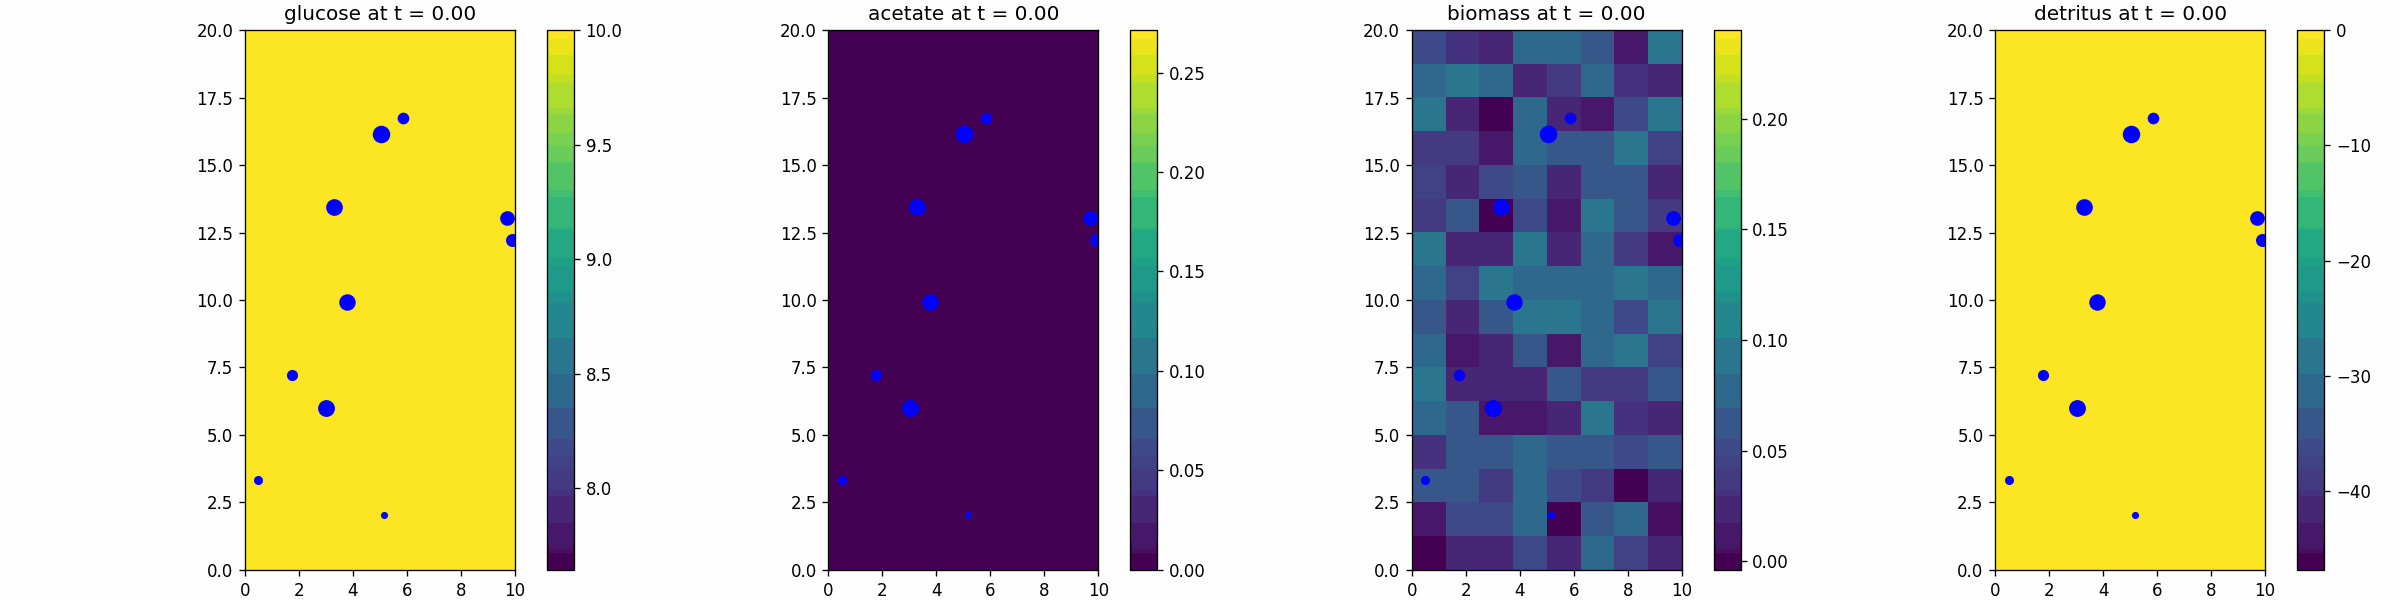

In [18]:
print('Plotting results...')
# plot
plot_species_distributions_with_particles_to_gif(
    particle_comets_results,
    out_dir='out',
    filename='particle_comets_with_fields.gif',
    title='',
    skip_frames=1,
    bounds=bounds,
)